In [37]:
import torch
import torchaudio
import os
import numpy as np
import pandas as pd
import glob
from IPython.display import Audio, display
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
path = "/home/cogentdom/data/train_files/"
files = glob.glob(os.path.join(path,"*.mp3"))
train = pd.read_csv('data/train.csv')

In [32]:
torchaudio.info(files[10])

(sox_signalinfo_t {
   rate-> 32000
   channels-> 1
   precision-> 16
   length-> 259200
   mult-> 0
 },
 sox_encodinginfo_t {
   encoding-> 22
   bits_per_sample-> 0
   compression-> inf
   reverse_bytes-> 0
   reverse_nibbles-> 0
   reverse_bits-> 0
   opposite_endian-> 0
 })

In [33]:
waveform, sample_rate = torchaudio.load(files[0])
waveform.shape, sample_rate

(torch.Size([1, 82944]), 32000)

In [34]:
def play_audio(waveform, sample_rate):
    waveform = waveform.numpy()
    
    num_channels, num_frames = waveform.shape
    if num_channels == 1:
        display(Audio(waveform[0], rate=sample_rate))
    elif num_channels == 2:
        display(Audio((waveform[0], waveform[1]), rate=sample_rate))
    else:
        raise ValueError("Waveforms with more than 2 channels are not supported.")
        
play_audio(waveform, sample_rate)

In [40]:
# Plot waveform and spectrogram

def _plot(waveform, sample_rate, title):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames)

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        if title == "Waveform":
            axes[c].plot(time_axis, waveform[c], linewidth=1)
            axes[c].grid(True)
        else:
            axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f'Channel {c+1}')
    figure.suptitle(title)
    plt.show(block=False)

def plot_waveform(waveform, sample_rate):
    _plot(waveform, sample_rate, title="Waveform")

def plot_specgram(waveform, sample_rate):
    _plot(waveform, sample_rate, title="Spectrogram")

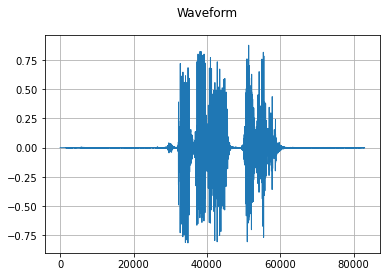

In [41]:
plot_waveform(waveform, sample_rate)

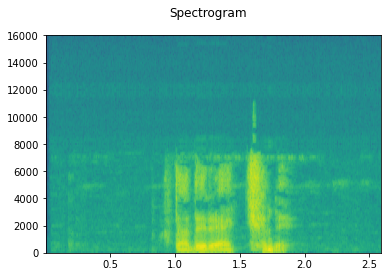

In [42]:
plot_specgram(waveform, sample_rate)

In [43]:
files[0]

'/home/cogentdom/data/train_files/common_voice_bn_31632826.mp3'

In [47]:
# Save audio
path = "/home/cogentdom/data/common_voice_bn_31632826.mp3"
torchaudio.save(path, waveform, sample_rate)

In [52]:
# Load again
metadata = torchaudio.info(path)
print(metadata)
waveform, sample_rate = torchaudio.load(path)
play_audio(waveform, sample_rate)

(sox_signalinfo_t {
  rate-> 32000
  channels-> 1
  precision-> 16
  length-> 84096
  mult-> 0
}
, sox_encodinginfo_t {
  encoding-> 22
  bits_per_sample-> 0
  compression-> inf
  reverse_bytes-> 0
  reverse_nibbles-> 0
  reverse_bits-> 0
  opposite_endian-> 0
}
)
